In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Absenteeism_at_work.csv")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [5]:
df.shape

(740, 21)

In [6]:
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

<function matplotlib.pyplot.show(*args, **kw)>

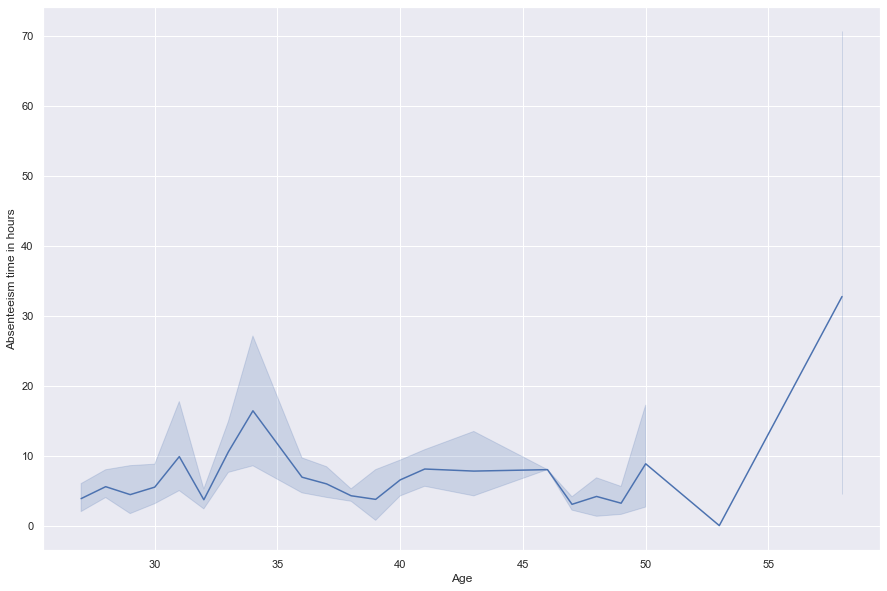

In [8]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Age",y="Absenteeism time in hours",data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

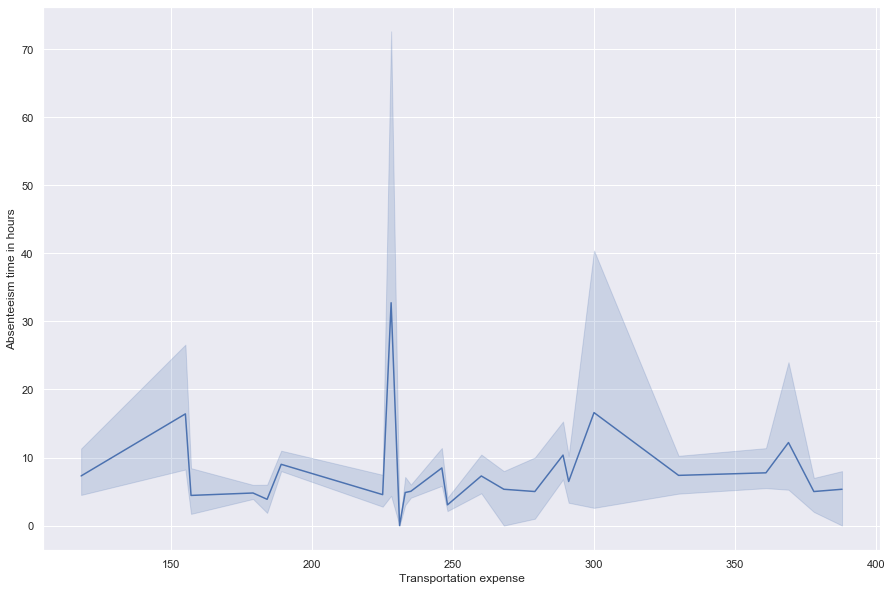

In [9]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Transportation expense",y="Absenteeism time in hours",data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

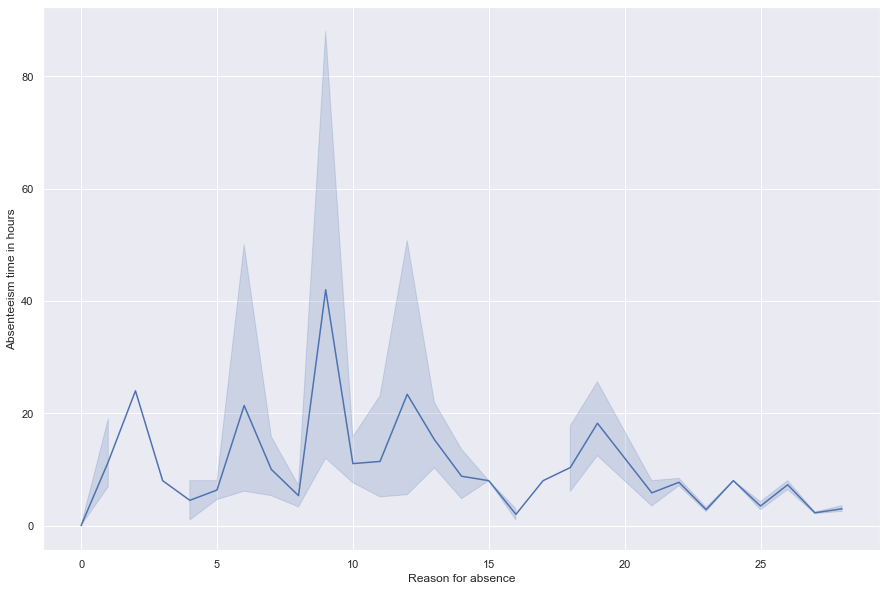

In [10]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Reason for absence",y="Absenteeism time in hours",data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

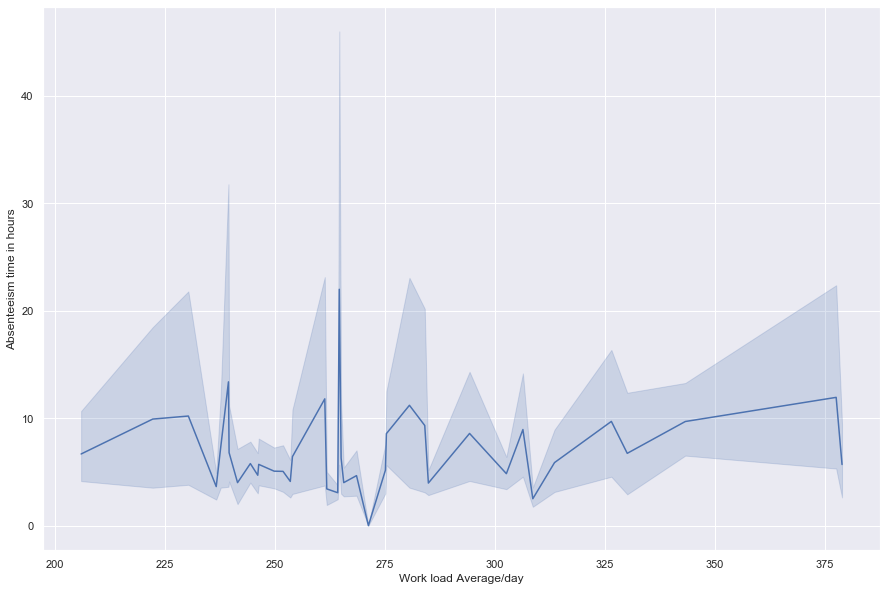

In [11]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Work load Average/day",y="Absenteeism time in hours",data=df)
plt.show

In [12]:
df.drop(['ID'],axis=1 , inplace=True)

In [13]:
df['Work load Average/day']=(df['Work load Average/day']-df['Work load Average/day'].min())/(df['Work load Average/day'].max()-df['Work load Average/day'].min())
df['Transportation expense']=(df['Transportation expense']-df['Transportation expense'].min())/(df['Transportation expense'].max()-df['Transportation expense'].min())
df['Reason for absence']=(df['Reason for absence']-df['Reason for absence'].min())/(df['Reason for absence'].max()-df['Reason for absence'].min())
df['Distance from Residence to Work']=(df['Distance from Residence to Work']-df['Distance from Residence to Work'].min())/(df['Distance from Residence to Work'].max()-df['Distance from Residence to Work'].min())
df['Service time']=(df['Service time']-df['Service time'].min())/(df['Service time'].max()-df['Service time'].min())
df['Age']=(df['Age']-df['Age'].min())/(df['Age'].max()-df['Age'].min())
df['Hit target']=(df['Hit target']-df['Hit target'].min())/(df['Hit target'].max()-df['Hit target'].min())
df['Weight']=(df['Weight']-df['Weight'].min())/(df['Weight'].max()-df['Weight'].min())
df['Height']=(df['Height']-df['Height'].min())/(df['Height'].max()-df['Height'].min())
df['Body mass index']=(df['Body mass index']-df['Body mass index'].min())/(df['Body mass index'].max()-df['Body mass index'].min())
df['Absenteeism time in hours']=(df['Absenteeism time in hours']-df['Absenteeism time in hours'].min())/(df['Absenteeism time in hours'].max()-df['Absenteeism time in hours'].min())

In [14]:
df.corr()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Reason for absence,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,0.088943,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,-0.460453,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,0.030986,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,-0.061154,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,-0.080193,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,-0.013865,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,-0.007840,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,-0.039224,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,-0.089445,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749
Hit target,0.088943,-0.460453,0.030986,-0.061154,-0.080193,-0.013865,-0.007840,-0.039224,-0.089445,1.000000,-0.147971,0.101062,-0.014091,-0.102480,0.051254,0.007201,-0.044947,0.093267,-0.088939,0.026695


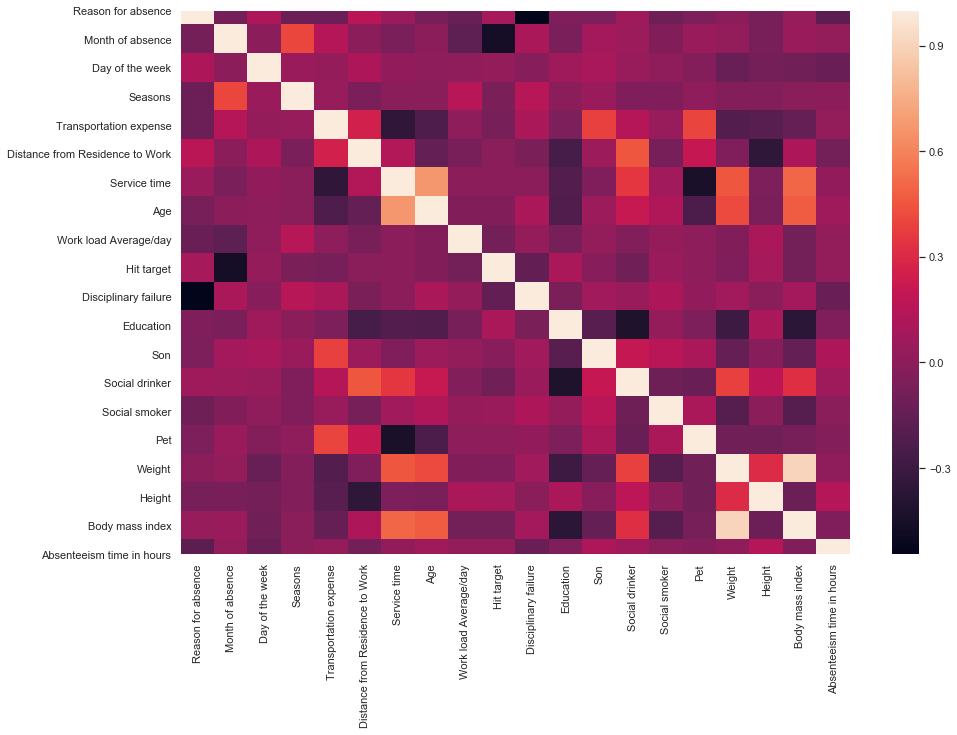

In [15]:
sns.heatmap(df.corr())

<function matplotlib.pyplot.show(*args, **kw)>

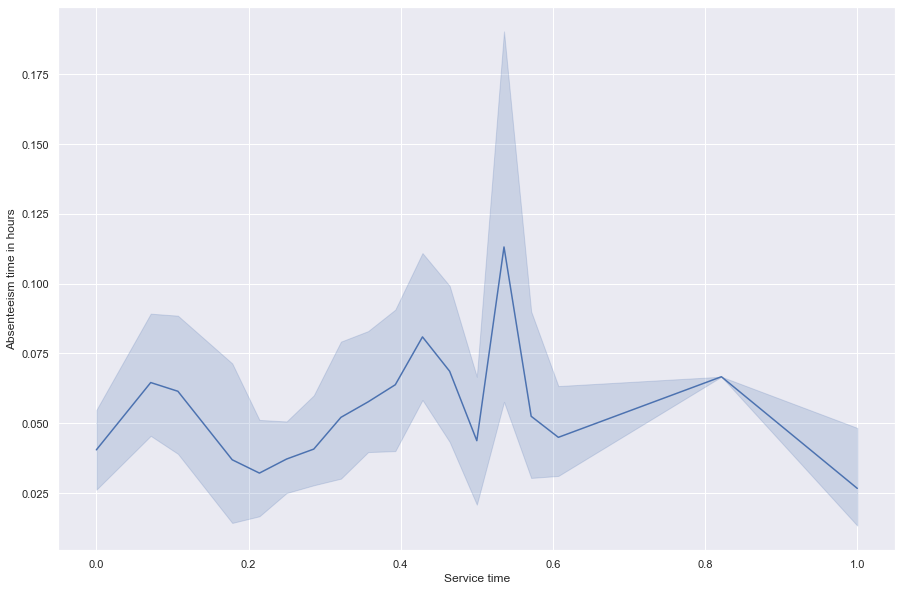

In [16]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Service time",y="Absenteeism time in hours",data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

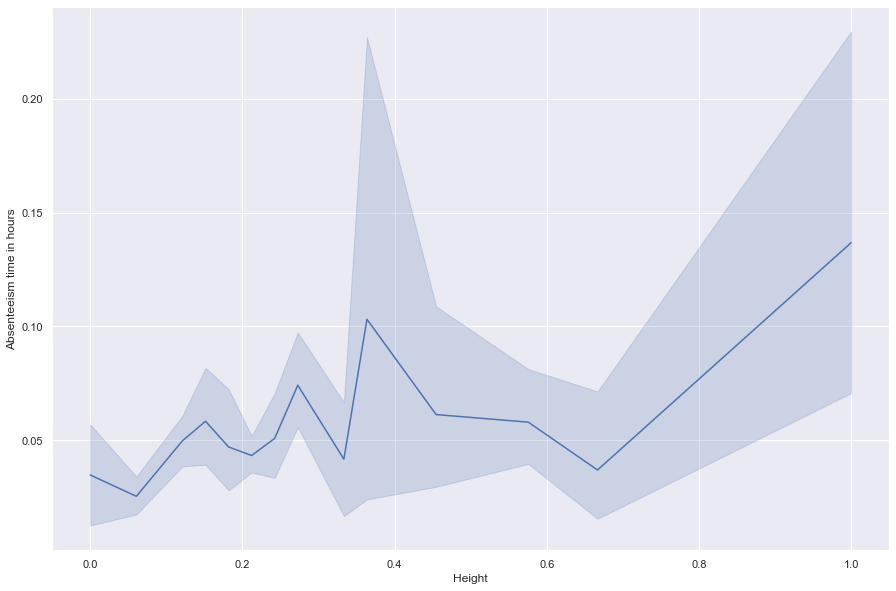

In [17]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Height",y="Absenteeism time in hours",data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

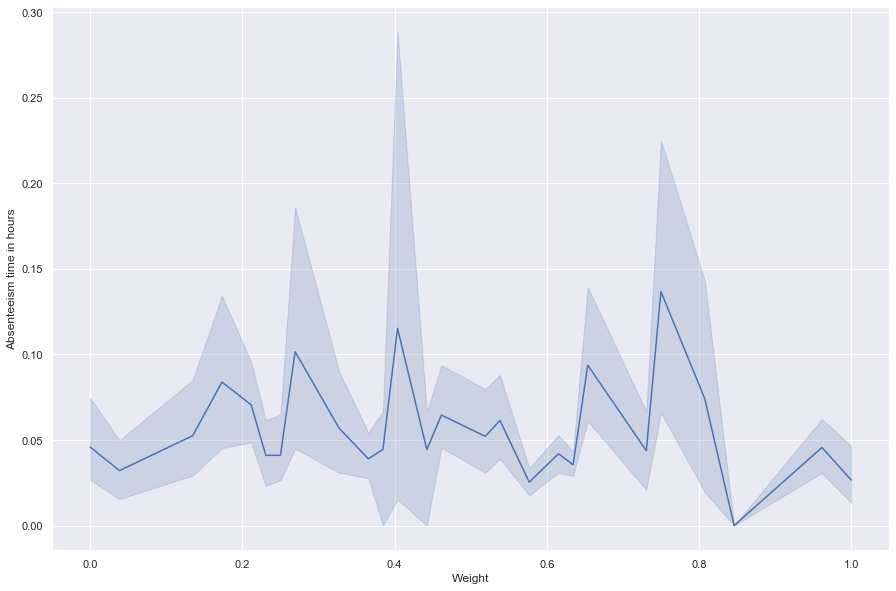

In [18]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Weight",y="Absenteeism time in hours",data=df)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

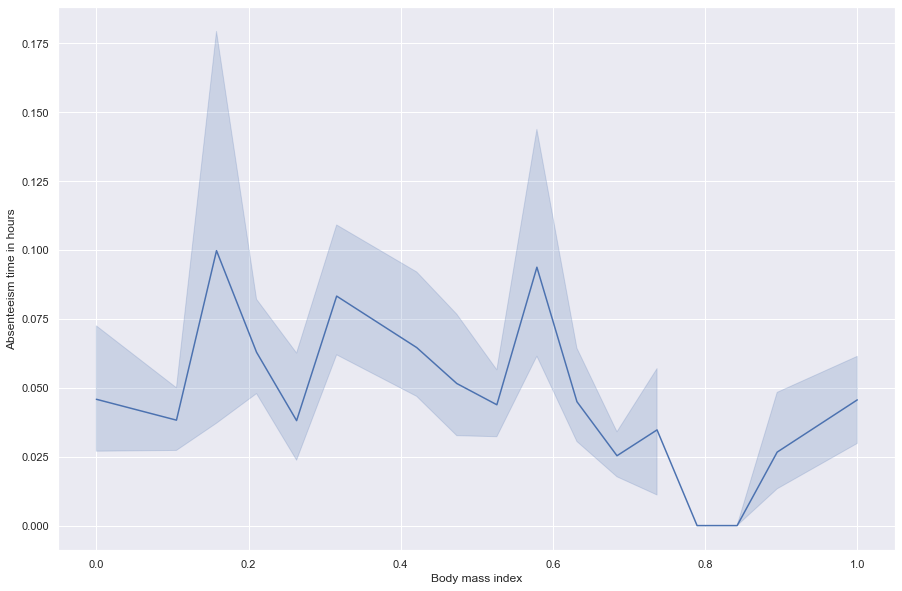

In [19]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Body mass index",y="Absenteeism time in hours",data=df)
plt.show

In [20]:
df.head(15)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.928571,7,3,1,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0,1,2,1,0,1,0.653846,0.272727,0.578947,0.033333
1,0.000000,7,3,1,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1,1,1,1,0,0,0.807692,0.454545,0.631579,0.000000
2,0.821429,7,4,1,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0,1,0,1,0,0,0.634615,0.212121,0.631579,0.016667
3,0.250000,7,5,1,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0,1,2,1,1,0,0.230769,0.151515,0.263158,0.033333
4,0.821429,7,5,1,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0,1,2,1,0,1,0.653846,0.272727,0.578947,0.016667
5,0.821429,7,6,1,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0,1,0,1,0,0,0.634615,0.212121,0.631579,0.016667
6,0.785714,7,6,1,0.900000,1.000000,0.071429,0.032258,0.194471,0.842105,0,1,1,1,0,4,0.461538,0.272727,0.421053,0.066667
7,0.821429,7,6,1,0.525926,0.957447,0.357143,0.290323,0.194471,0.842105,0,1,4,1,0,0,0.173077,0.151515,0.210526,0.033333
8,0.678571,7,2,1,0.137037,0.148936,0.464286,0.225806,0.194471,0.842105,0,1,2,1,0,0,0.750000,1.000000,0.315789,0.333333
9,0.785714,7,2,1,0.433333,0.127660,0.464286,0.322581,0.194471,0.842105,0,3,1,0,0,1,0.615385,0.272727,0.526316,0.066667


In [21]:
X= df.drop(['Absenteeism time in hours'], axis = 1)
print(X.shape)

(740, 19)


In [22]:
y =df['Absenteeism time in hours'] 
print(y.shape)

(740,)


In [23]:
from scipy.stats import zscore

z_score=abs(zscore(df))
print(df.shape)
loan=df.loc[(z_score<3).all(axis=1)]
print(loan.shape)

(740, 20)
(576, 20)


In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 51)

In [26]:
lr=LinearRegression()
la=Lasso()
en=ElasticNet()
ri=Ridge()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor(random_state=97)
ab=AdaBoostRegressor(random_state=97)
rf=RandomForestRegressor(random_state=97)
gb=GradientBoostingRegressor(random_state=97)

In [27]:
models=[]
models.append(("LinearRegression",lr))
models.append(("Lasso",la))
models.append(("ElasticNet",en))
models.append(("Ridge",ri))
models.append(("KNeighborsRegressor",kn))
models.append(("DecisionTreeRegressor",dt))
models.append(("AdaBoostRegressor",ab))
models.append(("RandomForestRegressor",rf))
models.append(("GradientBoostingRegressor",gb))

In [28]:
model=[]
R2_score=[]
cvs=[]
MSE=[]
for i,model in models:
    print("-------------------",model,"----------------------")
    print("\n")
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    print("R2_score: ",r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pred)
    print("MSE: ",mse)
    MSE.append(mse)
    score=cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print("Cross Validation: ",score)
    cvs.append(score)
    print("\n")

------------------- LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ----------------------


R2_score:  0.04442426503736119
MSE:  0.00808256150861204
Cross Validation:  0.0748541088803966


------------------- Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -0.005692221205493286
MSE:  0.008506462585034012
Cross Validation:  -0.011305480908164101


------------------- ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -0.005692221205493286
MSE:  0.008506462585034012
Cross Validation:  -0.011305480908164101


------------------- Ridge(alpha=1.0, copy_X=True, fit_inter

I Choose Linear regression as my final model because it perform very well on our dataset.

R2_score:  0.04442426503736119

MSE:  0.00808256150861204

Cross Validation:  0.0748541088803966


In [29]:
from sklearn.externals import joblib

joblib.dump(lr,'df_joblib')

['df_joblib']